In [0]:
import numpy as np
import matplotlib.pyplot as plt

# load_data reads the data from a txt file and divedes it into X (input) and y (output).
def load_data():
    points = np.genfromtxt('data-nonlinear.txt', delimiter = ',')
    X = points[:,0:2]
    y = points[:,2]
    y = y.reshape((len(y),1))
    return X.T, y.T

# map_feature creates new features based on the first input X, in this case X goes from 2 features to 6
def map_feature(X1, X2, shape, degree = 6):
    new_X = np.ones((degree, shape))
    new_X[0,:] = (X1)
    new_X[1,:] = (X2)
    new_X[2,:] = (X1**2)
    new_X[3,:] = (X2**2)
    new_X[4,:] = (X1*X2)
    new_X[5,:] = ((X1*X2)**2)
    return new_X

# Function that plot the scattered input data X
def plot_data(X, y):
    accepted = plt.scatter(X[0, np.where(y == 1)], X[1, np.where(y == 1)], color='blue', label="label 1",)
    not_accepted = plt.scatter(X[0, np.where(y == 0)], X[1, np.where(y == 0)], color='red', label="label 0")        
    plt.legend(handles=[accepted, not_accepted], loc = 3)
    plt.show()

# W (weights) and b (bias) are  initialized with zeroes, could use np.zero() too.
def initialize_with_zeros(dim):
    W = np.zeros(shape=(dim, 1))
    b = 0
    return W, b

# With some Weights and bias this function predicts the values after the activation function Sigmoid is done
def predict(W, b, X):

    m = X.shape[1]
    y_hat = np.zeros((1,m))
    W = W.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(W.T, X) + b)
    
    for i in range(A.shape[1]):
        
        if A[0,i] > 0.5:
            y_hat[0,i] = 1
        else:
            y_hat[0,i] = 0
    return y_hat

# Sigmoid is an Activation function that turns the linear function to a non-linear
def sigmoid(Z):
    A =  1 / (1 + np.exp(-Z))    
    return A

# Calculates the Loss value after for all the examples and derives it to find the gradients for the weights and bias
def propagate(W, b, X, y):
    m = X.shape[1]
    A = sigmoid(np.dot(W.T, X) + b)

    cost = - (1 / m) * np.sum((y * np.log(A)) + ((1 - y) * np.log(1 - A)))

    dw = (1 / m) * np.dot(X, (A - y).T)
    db = (1 / m) * np.sum(A - y)

    cost = np.squeeze(cost)

    grads = {"dw": dw,
             "db": db}
    return grads, cost

# Optimize does the backpropagation where it updates the weights and bias based on the gradients and the learning rate
def optimize(W, b, X, y, num_iterations, learning_rate):
    costs = []    
    accuracys = []
    for i in range(num_iterations):

        grads, cost = propagate(W, b, X, y)

        dw = grads["dw"]
        db = grads["db"]

        W = W - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            plot_predicted_data(X, y, W, b)
            hat = predict(W, b, X)
            acc = 100 - np.mean(np.abs(hat - y)) * 100
            accuracys.append(acc)
            costs.append(cost)
    
    params = {"W": W,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs, accuracys

# The model of the Machine Learning where it forwards propagate the data and backprogpagates the error
def model(X, y, num_iterations = 10000, learning_rate = 0.1):    
    W, b = initialize_with_zeros(X.shape[0])

    parameters, grads, costs, accuracys = optimize(W, b, X, y, num_iterations, learning_rate)
    W = parameters["W"]
    b = parameters["b"]

    y_hat = predict(W, b, X)
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(y_hat - y)) * 100))
    
    d = {"costs": costs,
         "y_hat" : accuracys,
         "W" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d
  
# The cost is computed at each 100 iterations of the Gradient Descent, and its value is stored to show the decreased value plotted in a graph.
def plot_cost_history(cost_history):
    plt.figure(2)
    plt.plot(cost_history, color = 'blue')    
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

def plot_accuracy_history(accuracy_history):
    plt.figure(2)
    plt.plot(accuracy_history, color = 'red')  
    plt.show()

# The data is plotted in a graph with the predicted boundary.
# The plot is called when the learning is happening so it is able to see the change happening in the function
def plot_predicted_data(X, y, W, b):
    plt.clf()
    accepted = plt.scatter(X[0, np.where(y == 1)], X[1, np.where(y == 1)], color='blue', label="label 0",)
    not_accepted = plt.scatter(X[0, np.where(y == 0)], X[1, np.where(y == 0)], color='red', label="label 1")
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    
    z = np.zeros((len(u), len(v)))
    for i in range (len(u)):
        for j in range (len(v)):
            z[i,j] = np.dot(W.T, map_feature(u[i], v[j], 1)) + b
    z = z.T
    plt.contour(u, v, z, 0)    
    plt.legend(handles=[accepted, not_accepted], loc = 3)
    plt.draw()

**Plot the training data**

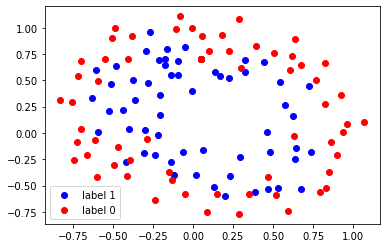

In [32]:
X, y = load_data()
plot_data(X, y)

**Plot the high dimensional function**

\\(z = \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2 + \theta_5 xy + \theta_6 x^2 y^2, \theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6 \in \mathbb{R} \\)

**Plot the training error**

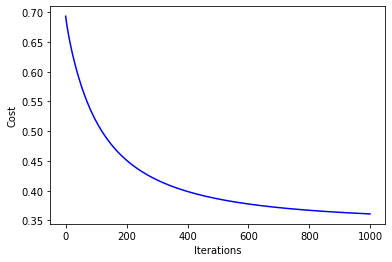

In [33]:
plot_cost_history(d["costs"])

**Plot the training accuracy**

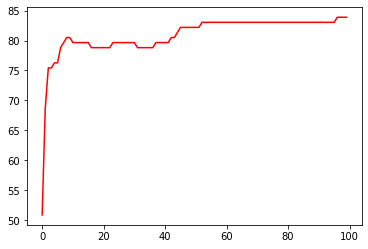

In [40]:
plot_accuracy_history(d["y_hat"])

**Final accuracy and optimal classifier**

Train accuracy: 83.89830508474577 %


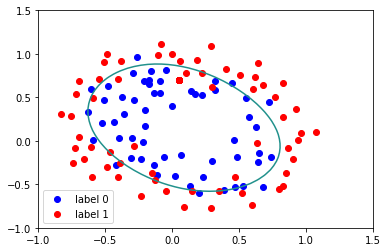

In [39]:
X = map_feature(X[0,:], X[1,:], X.shape[1])
d = model(X, y)
plot_predicted_data(X, y, d["W"], d["b"])